In [1]:
import os
import math
import requests
import numpy as np
import credentials
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from questrade import QuestradeBot

# Personal Inputs

In [2]:
ACCOUNT_NUM = credentials.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = credentials.QUESTRADE_API_CODE

# QuestradeBot Initialization

In [3]:
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

# Account Balance

In [4]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.00,0.00
USD,21744.9715,10404.32,32149.2915,67.64,32.36


# Portfolio Holdings

In [5]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,540.42,-8.50,5.19
O,REALTY INCOME CORP,USD,75,5178.75,12.83,49.78
JPM,JPMORGAN CHASE & CO.,USD,6,950.46,3.23,9.14
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,691.32,17.76,6.64
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,752.62,17.72,7.23
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1146.04,-6.07,11.02
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,596.44,-1.69,5.73
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,582.45,-1.81,5.60


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

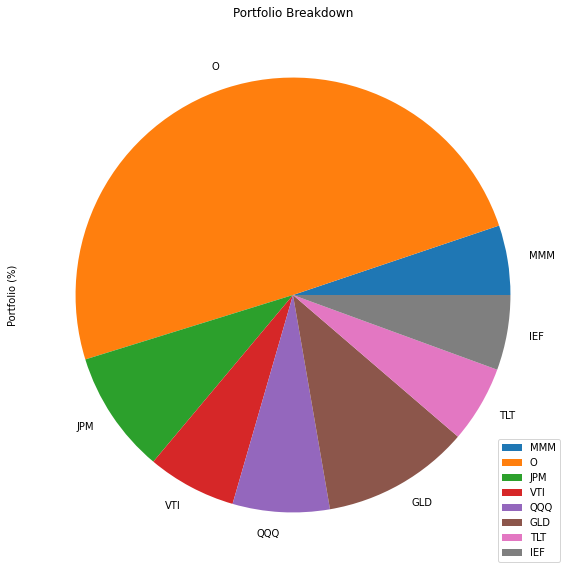

In [6]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

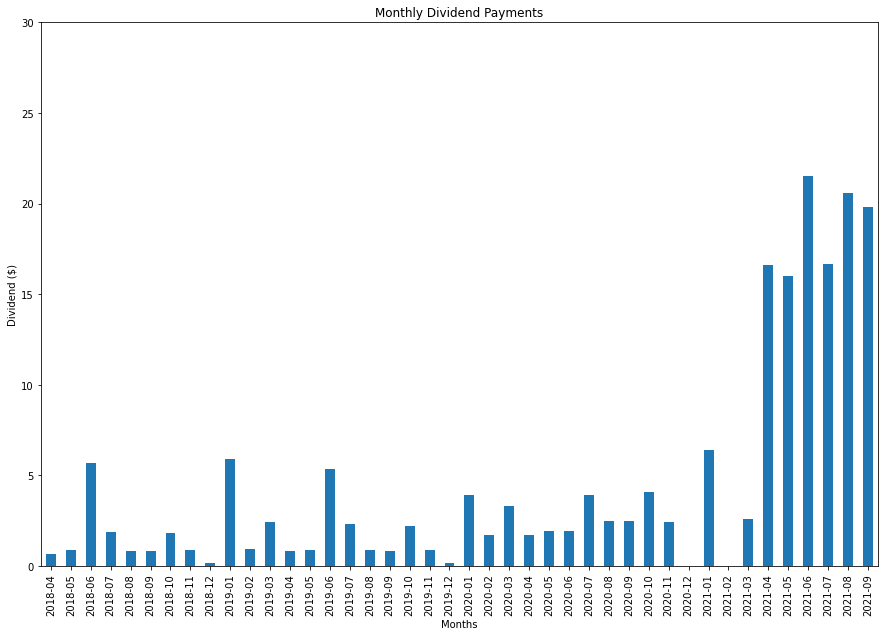

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark